In [ ]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! git clone https://github.com/jtz8xj/ds3001group

Cloning into 'ds3001group'...
remote: Enumerating objects: 631, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 631 (delta 112), reused 34 (delta 31), pack-reused 450 (from 1)
Receiving objects: 100% (631/631), 49.77 MiB | 25.66 MiB/s, done.
Resolving deltas: 100% (317/317), done.


In [ ]:
#importing files for demographics

rawdemo2012 = pd.read_excel("https://raw.githubusercontent.com/jtz8xj/ds3001group/main/dataverse_files/demographicsallstates2016.xlsx")
rawdemo2016 = pd.read_excel("https://raw.githubusercontent.com/jtz8xj/ds3001group/main/dataverse_files/demographicsallstates2016.xlsx")
rawdemo2020 = pd.read_excel("https://raw.githubusercontent.com/jtz8xj/ds3001group/main/dataverse_files/demographicsallstates2020.xlsx")


rawdemo2012 = rawdemo2012[rawdemo2012["State Name"] == "Georgia"]
rawdemo2016 = rawdemo2020[rawdemo2016["State Name"] == "Georgia"]
rawdemo2020 = rawdemo2020[rawdemo2020["State Name"] == "Georgia"]


In [ ]:
gapoverty = pd.read_csv("/content/ds3001group/georgia/gapoverty.csv")
gapoverty = gapoverty.drop([0,1, 38, 39])

gapoverty2012 = gapoverty[gapoverty['Year'] == 2012]
gapoverty2016 = gapoverty[gapoverty['Year'] == 2016]
gapoverty2020 = gapoverty[gapoverty['Year'] == 2020]

gapoverty2012.head(5)

,Year,ID,Name,Poverty Universe,Number in Poverty,90% Confidence Interval,Percent in Poverty,90% Confidence Interval.1
322,2012,0,United States,"306,086,063","48,760,123","48,528,543 to 48,991,703",15.9,15.8 to 16.0
323,2012,13000,Georgia,"9,652,654","1,852,459","1,826,052 to 1,878,866",19.2,18.9 to 19.5
324,2012,13001,Appling County,"17,864","3,874","3,057 to 4,691",21.7,17.1 to 26.3
325,2012,13003,Atkinson County,"8,244","2,152","1,741 to 2,563",26.1,21.1 to 31.1
326,2012,13005,Bacon County,"10,836","2,580","2,082 to 3,078",23.8,19.2 to 28.4


In [ ]:
outcomes = pd.read_excel("/content/ds3001group/georgia/georgiaoutcomes.xlsx")

outcomes2012 = outcomes [outcomes ['year'] == 2012]
outcomes2016 = outcomes [outcomes [ 'year']== 2016]
outcomes2020 = outcomes [outcomes [ 'year'] == 2020]

In [ ]:
# Merge 2012

election2012 = pd.merge(rawdemo2012, gapoverty2012, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2012 = pd.merge(election2012, outcomes2012, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2012

In [ ]:
#Merge 2016

election2016 = pd.merge(rawdemo2016, gapoverty2016, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2016 = pd.merge(election2016, outcomes2016, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2012

In [ ]:
# Merge 2020

election2020 = pd.merge(rawdemo2020, gapoverty2020, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2020 = pd.merge(election2020, outcomes2020, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2012
election2020.head(10)

,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,County Subdivision Code,...,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,G1300010,2016-2020,GA,NaN,NaN,Georgia,13.0,Appling County,1.0,NaN,...,GA,APPLING,13001.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3874.0,8341.0,20220315.0,ADVANCED VOTING
1,G1300030,2016-2020,GA,NaN,NaN,Georgia,13.0,Atkinson County,3.0,NaN,...,GA,ATKINSON,13003.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,1419.0,3155.0,20220315.0,ADVANCED VOTING
2,G1300050,2016-2020,GA,NaN,NaN,Georgia,13.0,Bacon County,5.0,NaN,...,GA,BACON,13005.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3099.0,4668.0,20220315.0,ADVANCED VOTING
3,G1300070,2016-2020,GA,NaN,NaN,Georgia,13.0,Baker County,7.0,NaN,...,GA,BAKER,13007.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,466.0,1555.0,20220315.0,ADVANCED VOTING
4,G1300090,2016-2020,GA,NaN,NaN,Georgia,13.0,Baldwin County,9.0,NaN,...,GA,BALDWIN,13009.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,5736.0,18251.0,20220315.0,ADVANCED VOTING
5,G1300110,2016-2020,GA,NaN,NaN,Georgia,13.0,Banks County,11.0,NaN,...,GA,BANKS,13011.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,5116.0,8801.0,20220315.0,ADVANCED VOTING
6,G1300130,2016-2020,GA,NaN,NaN,Georgia,13.0,Barrow County,13.0,NaN,...,GA,BARROW,13013.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,16782.0,37921.0,20220315.0,ADVANCED VOTING
7,G1300150,2016-2020,GA,NaN,NaN,Georgia,13.0,Bartow County,15.0,NaN,...,GA,BARTOW,13015.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,21499.0,50467.0,20220315.0,ADVANCED VOTING
8,G1300170,2016-2020,GA,NaN,NaN,Georgia,13.0,Ben Hill County,17.0,NaN,...,GA,BEN HILL,13017.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3140.0,6560.0,20220315.0,ADVANCED VOTING
9,G1300190,2016-2020,GA,NaN,NaN,Georgia,13.0,Berrien County,19.0,NaN,...,GA,BERRIEN,13019.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3825.0,7743.0,20220315.0,ADVANCED VOTING


In [ ]:
election2012['Percent in Poverty'].value_counts()
election2016['Percent in Poverty'].value_counts()
election2020['Percent in Poverty'].value_counts()
election2012['Percent in Poverty'].isnull().sum() # No missing values
election2016['Percent in Poverty'].isnull().sum() # No missing values
election2020['Percent in Poverty'].isnull().sum() # FOUR missing values, test in next row

4

In [ ]:
# display the four rows in election2020 for which there are missing values
missing_poverty_rows = election2020[election2020['Percent in Poverty'].isnull()]
#display(missing_poverty_rows.style)

Text(0.5, 1.0, 'Election 2020')

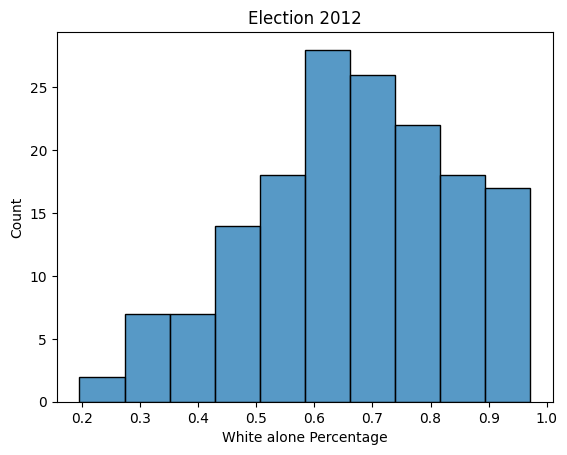

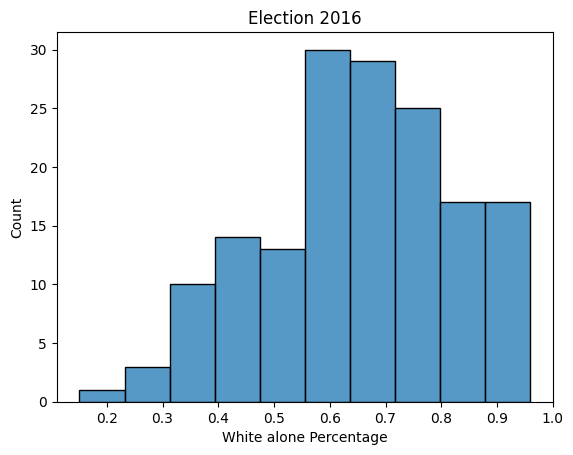

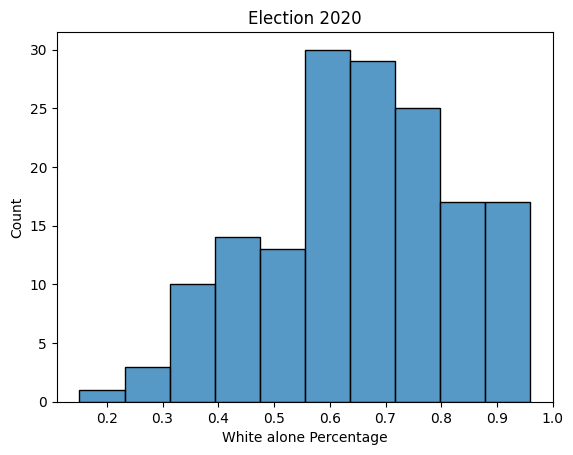

In [ ]:
#Election Results

sns.histplot(election2012['White alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['White alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['White alone Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of White people
plt.title('Election 2020')

<Axes: title={'center': 'White alone Percentage'}, xlabel='party'>

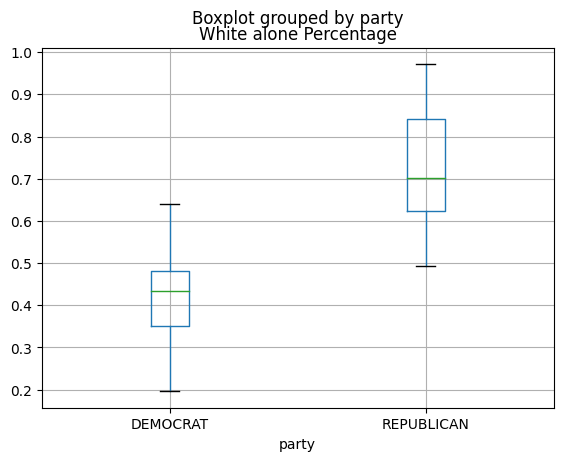

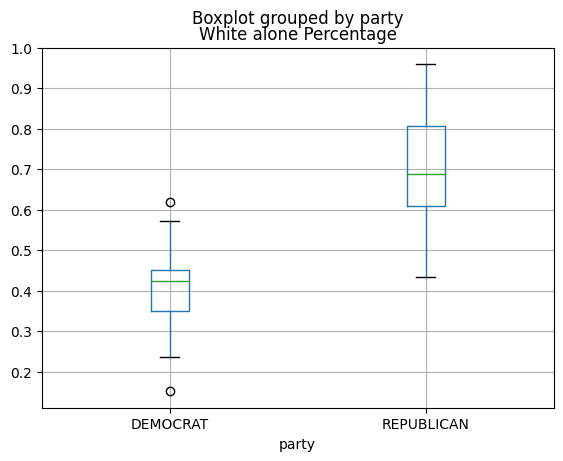

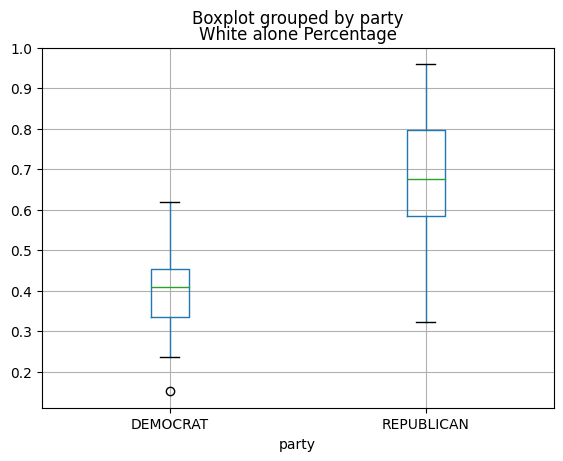

In [ ]:
election2012.boxplot(column = 'White alone Percentage',by = 'party')
election2016.boxplot(column = 'White alone Percentage',by = 'party')
election2020.boxplot(column = 'White alone Percentage',by = 'party') # Boxplot of White people by voted party

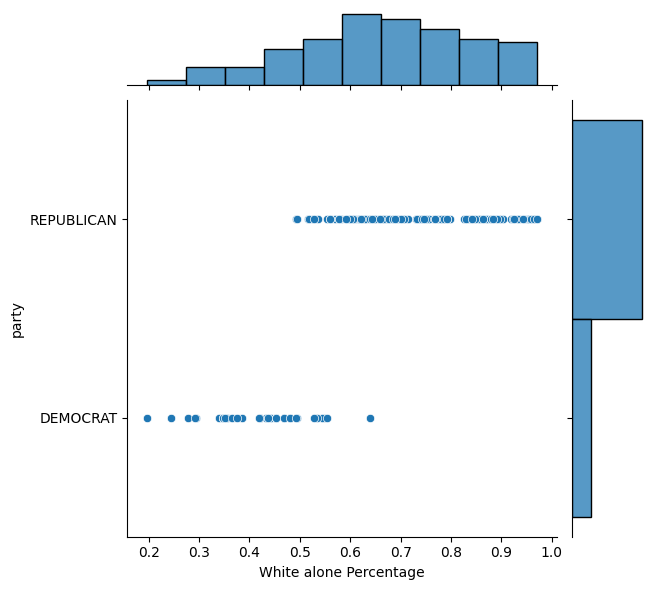

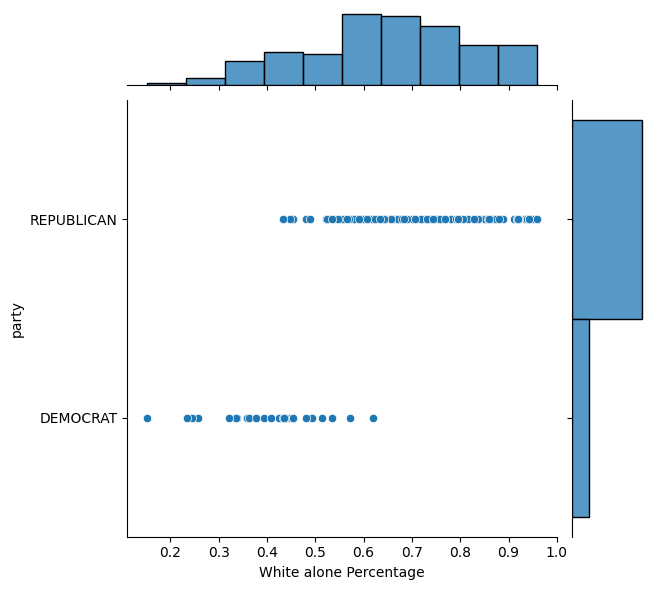

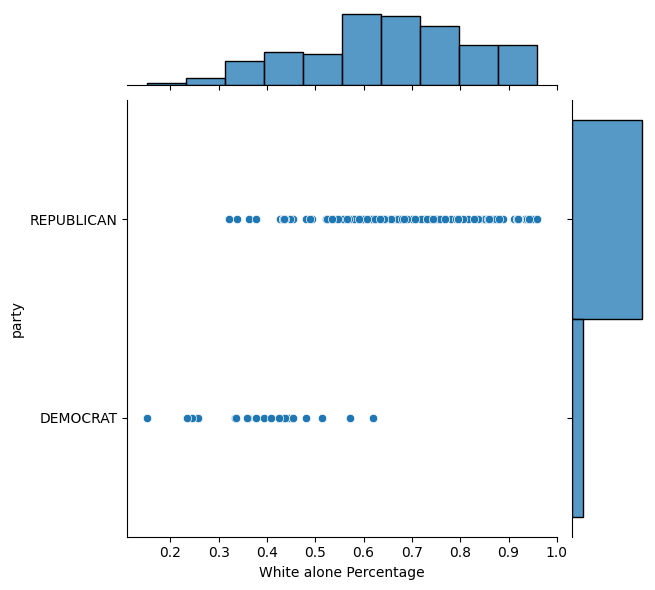

In [ ]:
sns.jointplot(x=election2012['White alone Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['White alone Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['White alone Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)

Text(0.5, 1.0, 'Election 2020')

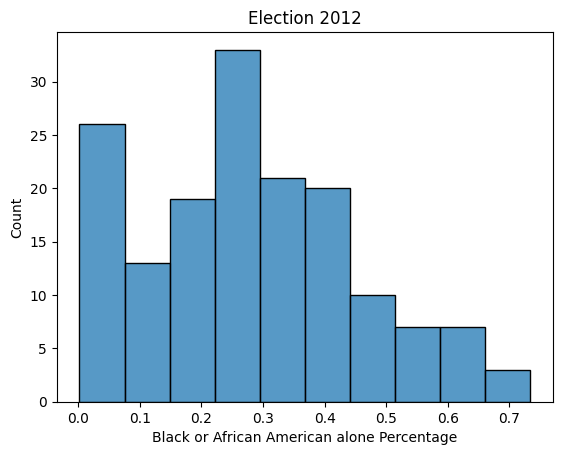

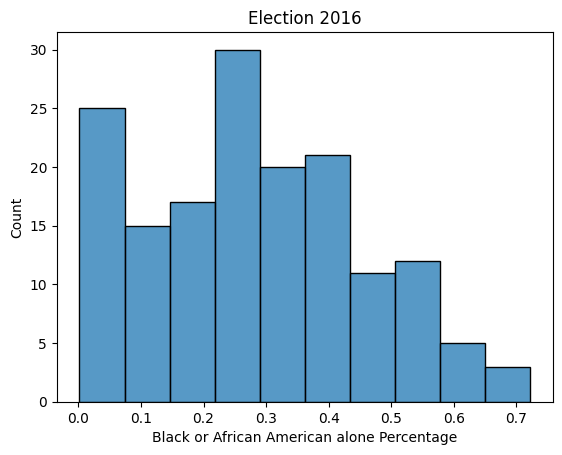

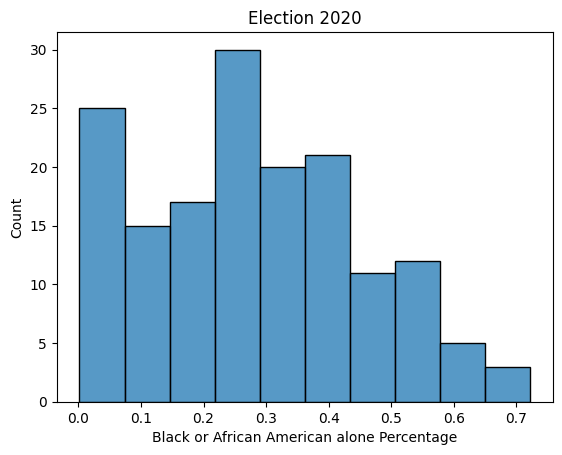

In [ ]:
sns.histplot(election2012['Black or African American alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Black or African American alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Black or African American alone Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of Black people
plt.title('Election 2020')

<Axes: title={'center': 'Black or African American alone Percentage'}, xlabel='party'>

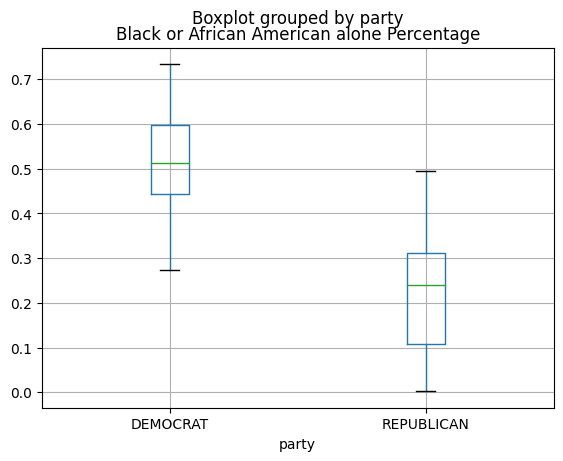

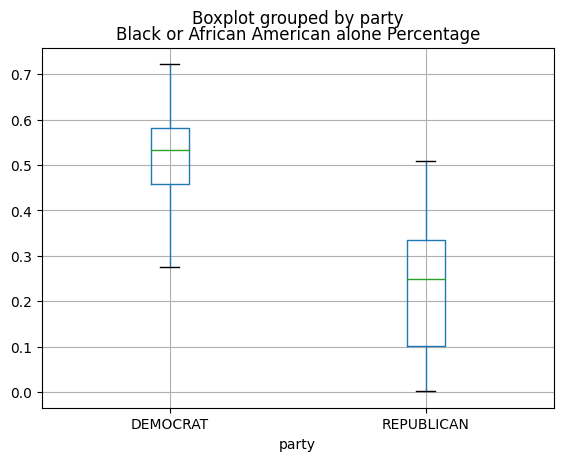

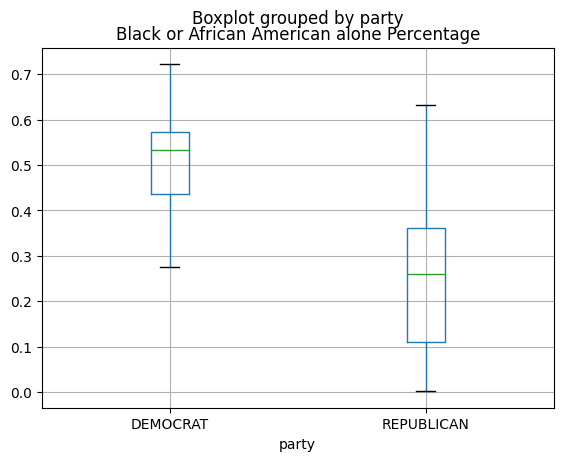

In [ ]:
election2012.boxplot(column = 'Black or African American alone Percentage',by = 'party')
election2016.boxplot(column = 'Black or African American alone Percentage',by = 'party')
election2020.boxplot(column = 'Black or African American alone Percentage',by = 'party') # Boxplot of Black people by voted party

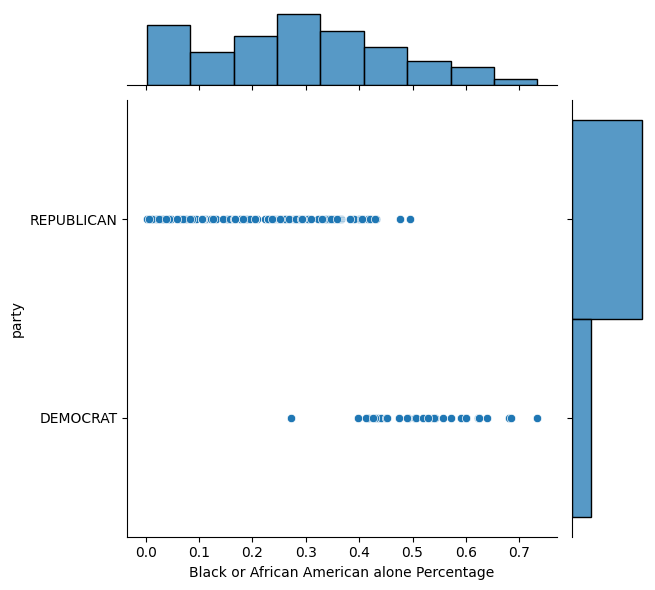

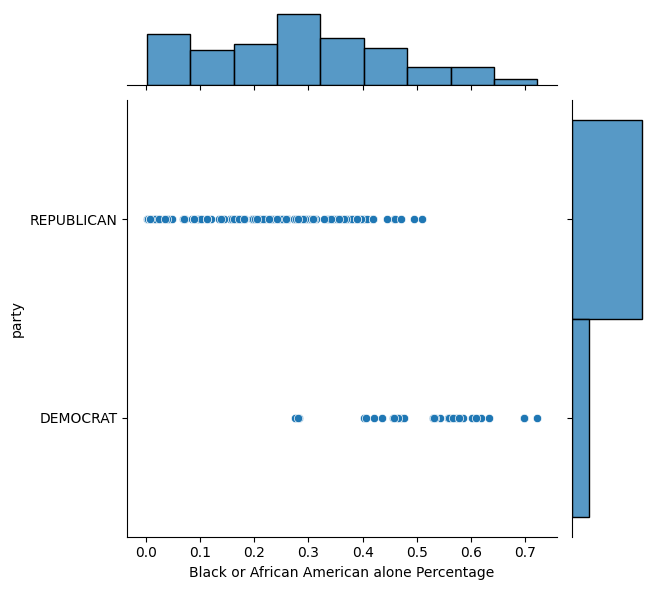

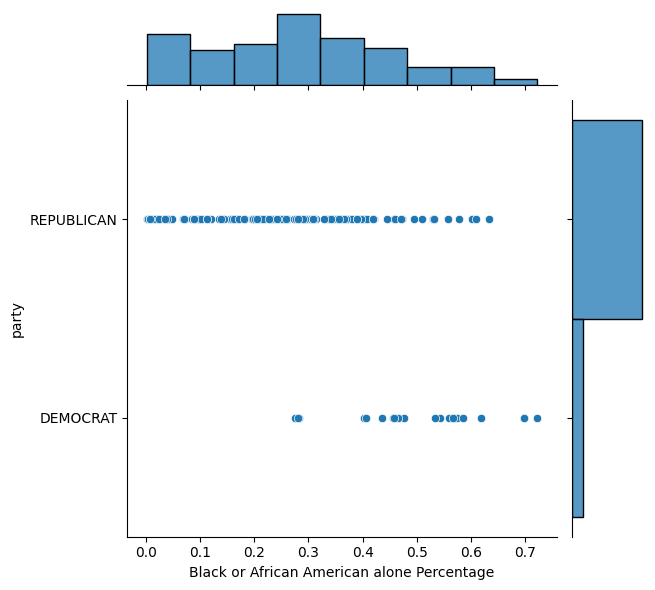

In [ ]:
sns.jointplot(x=election2012['Black or African American alone Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Black or African American alone Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Black or African American alone Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)

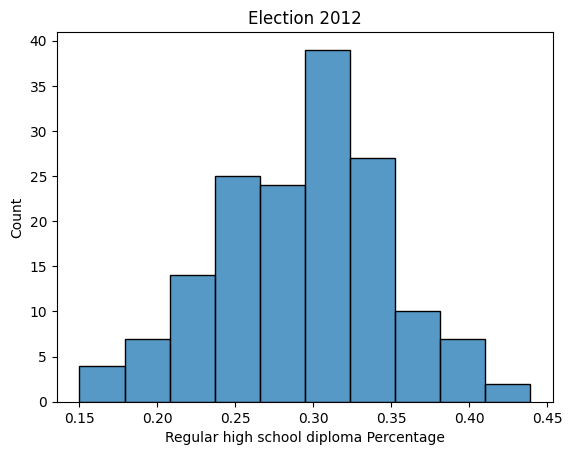

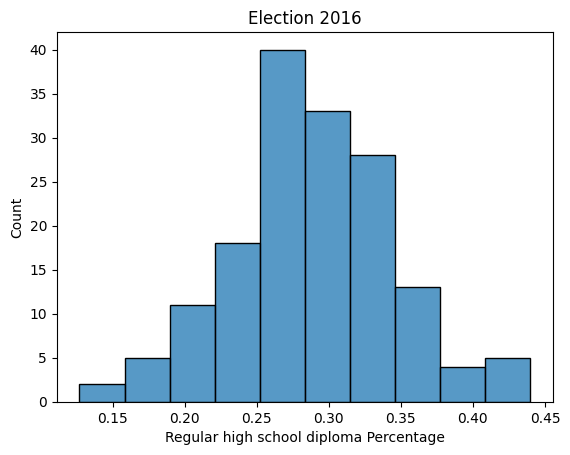

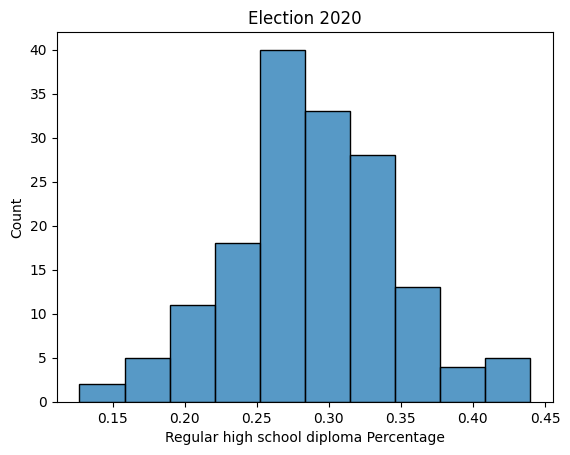

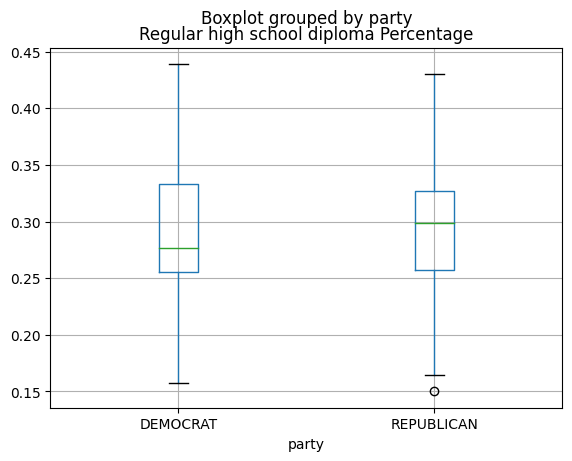

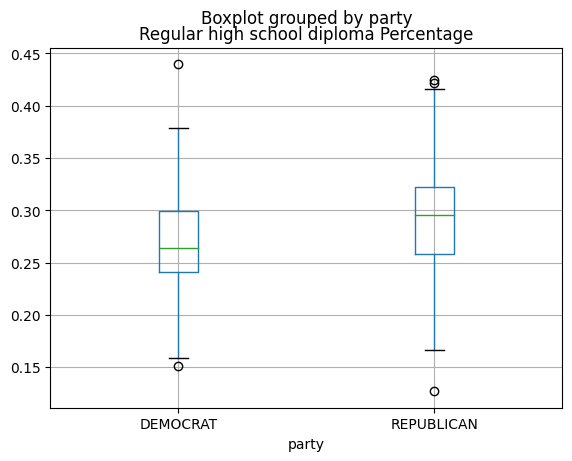

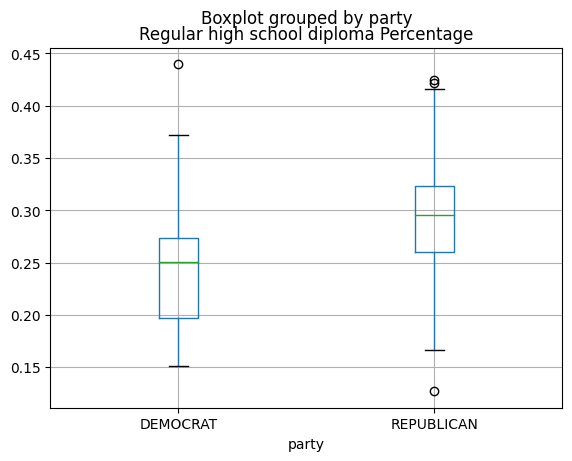

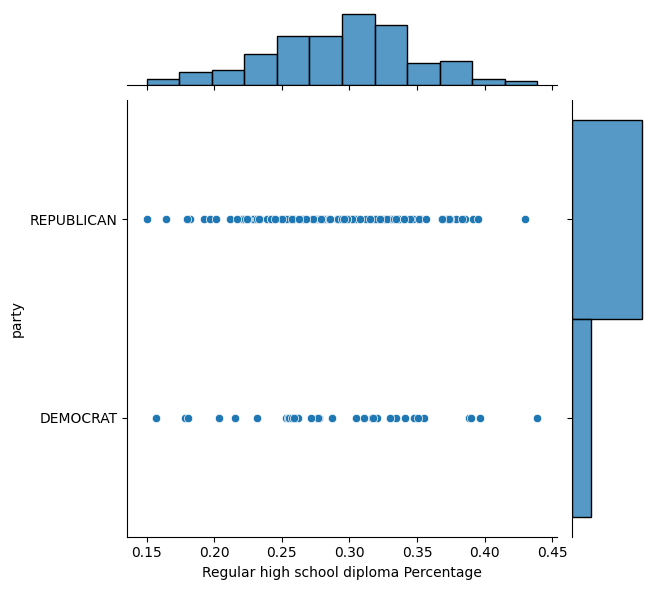

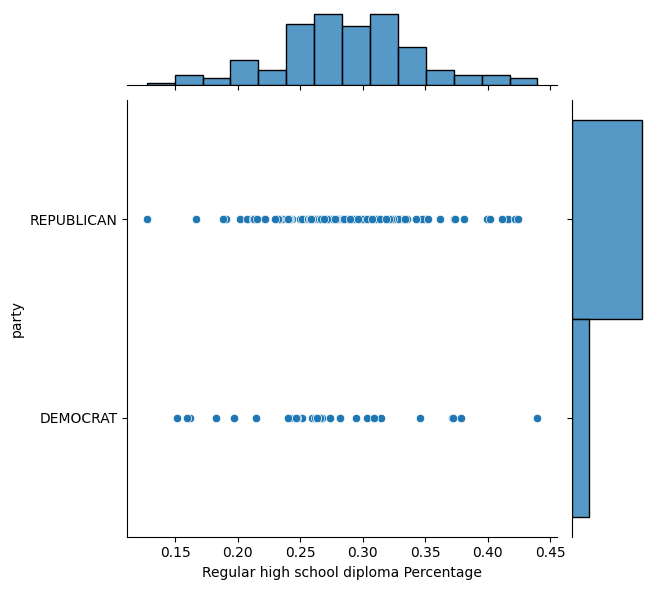

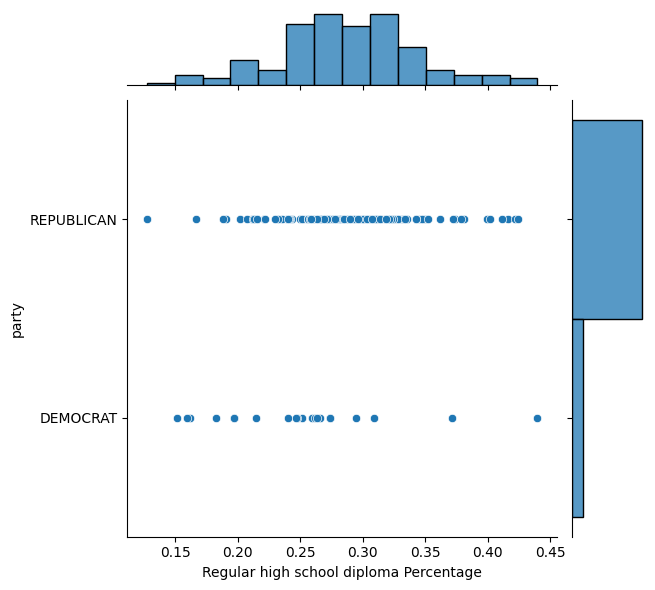

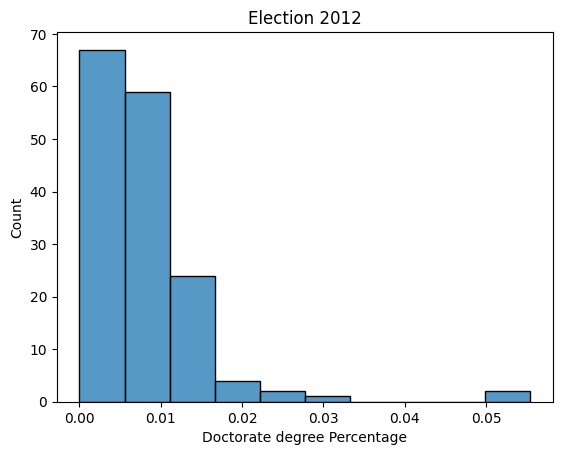

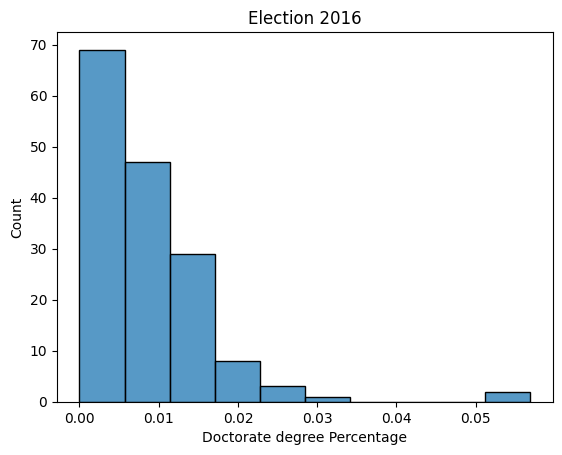

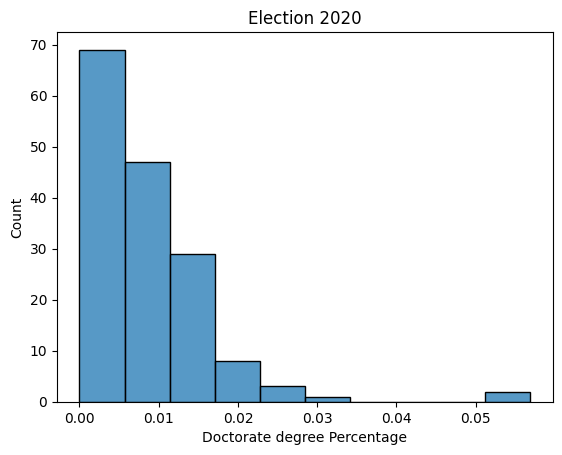

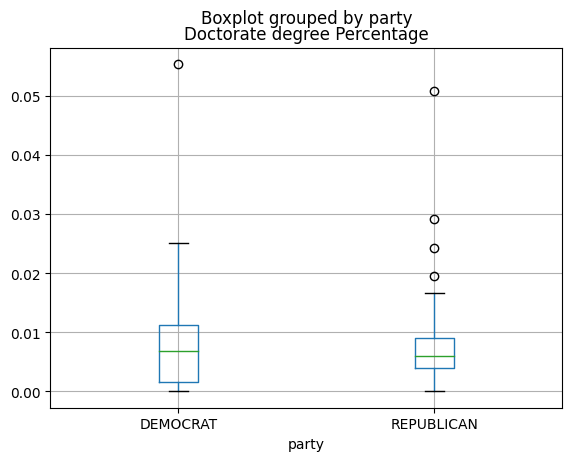

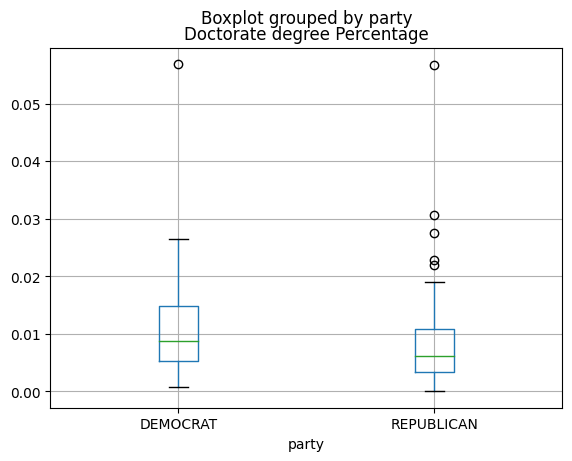

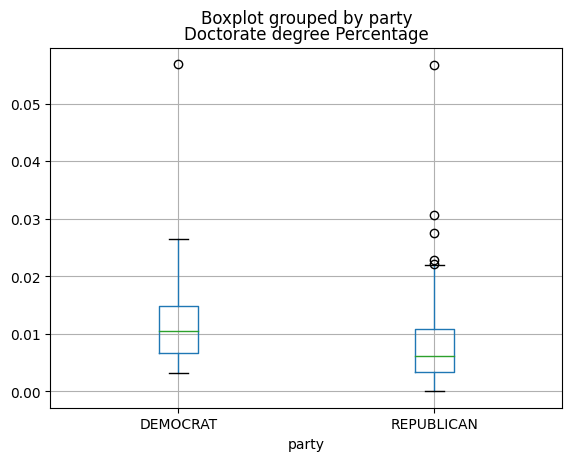

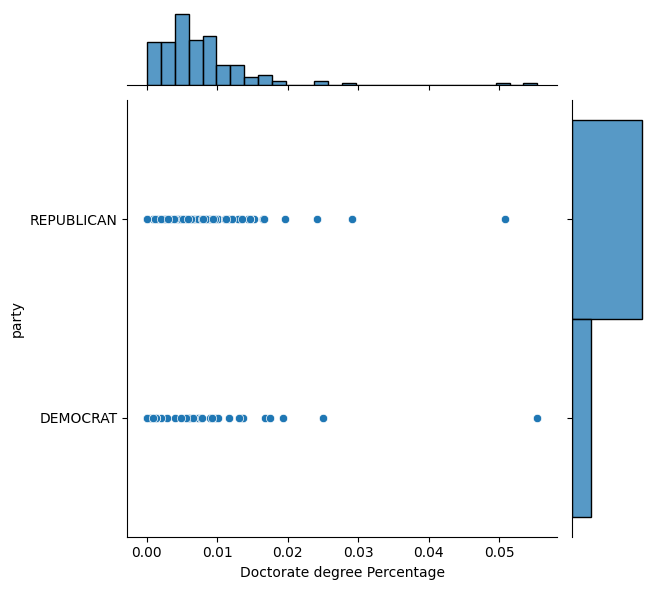

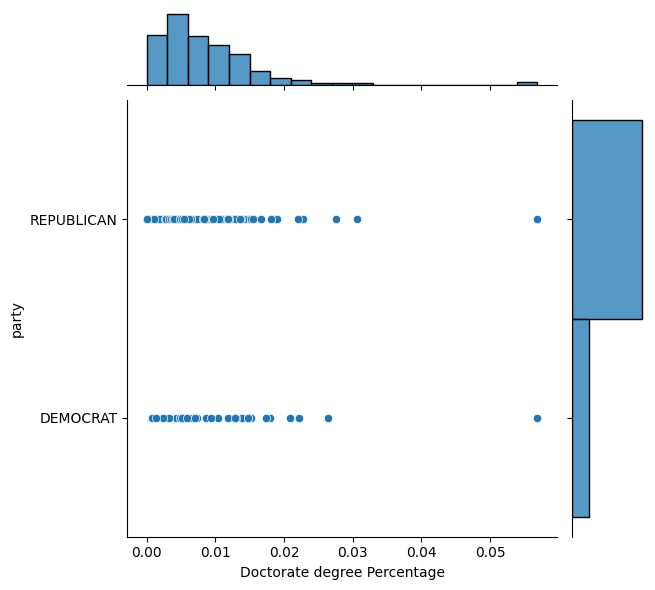

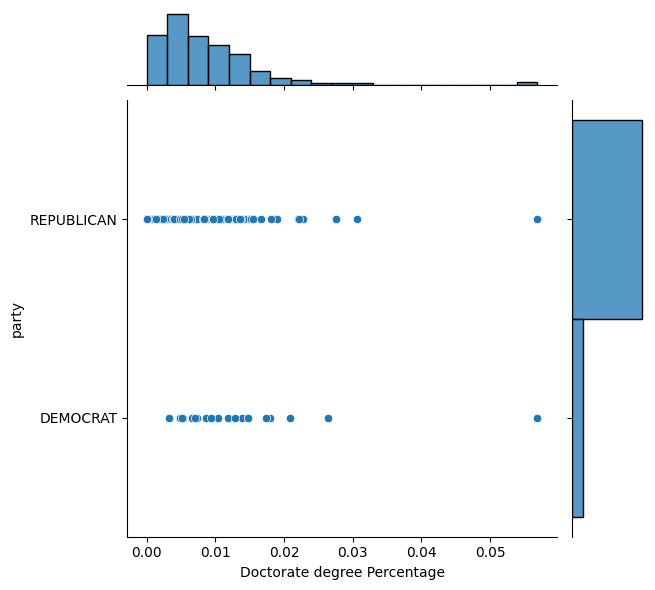

In [ ]:
# EDA - Education

sns.histplot(election2012['Regular high school diploma Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Regular high school diploma Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Regular high school diploma Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')

election2012.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
election2016.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
election2020.boxplot(column = 'Regular high school diploma Percentage',by = 'party') # Boxplot of high school graduates by voted party

sns.jointplot(x=election2012['Regular high school diploma Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Regular high school diploma Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Regular high school diploma Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


sns.histplot(election2012['Doctorate degree Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Doctorate degree Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Doctorate degree Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of those with a doctorate
plt.title('Election 2020')

election2012.boxplot(column = 'Doctorate degree Percentage',by = 'party')
election2016.boxplot(column = 'Doctorate degree Percentage',by = 'party')
election2020.boxplot(column = 'Doctorate degree Percentage',by = 'party') # Boxplot of proportion of doctors by voted party

sns.jointplot(x=election2012['Doctorate degree Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Doctorate degree Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Doctorate degree Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)

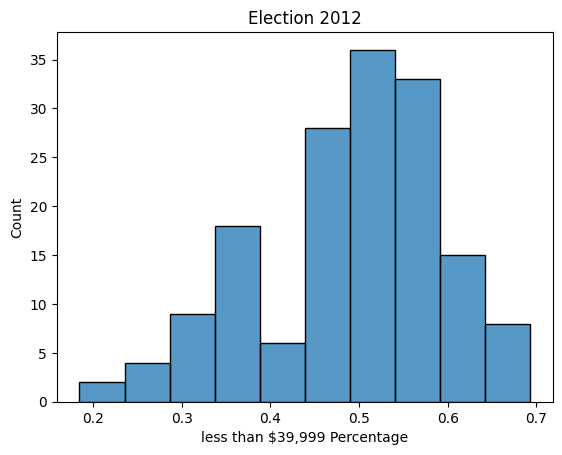

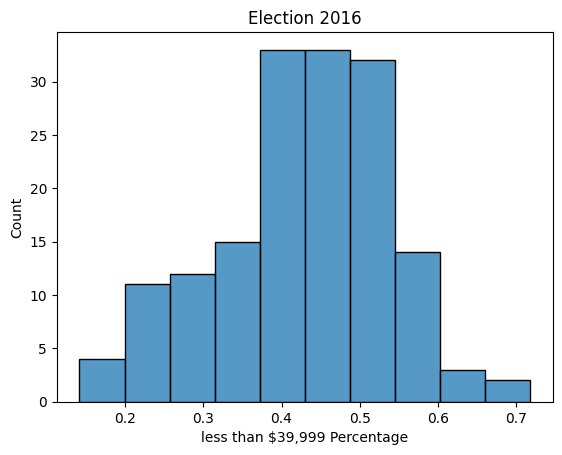

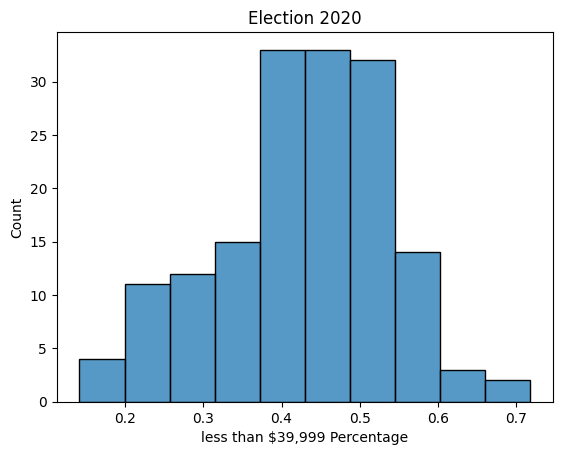

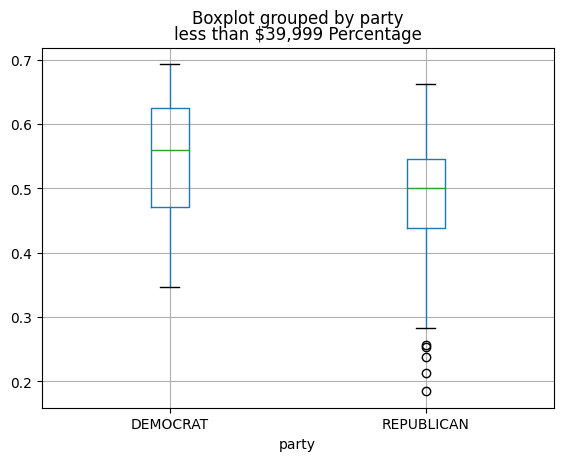

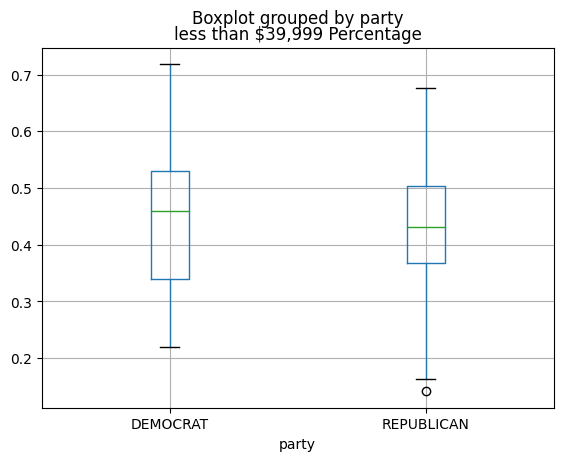

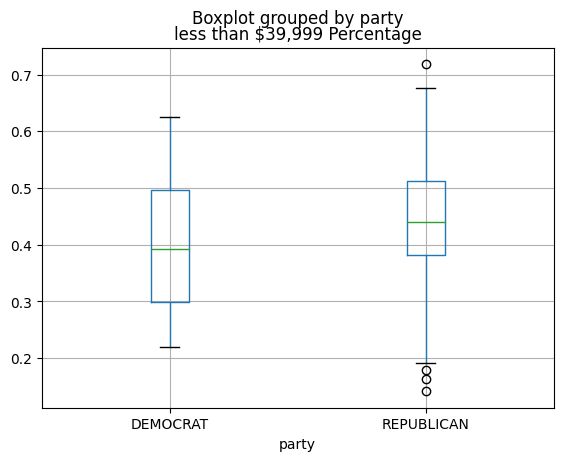

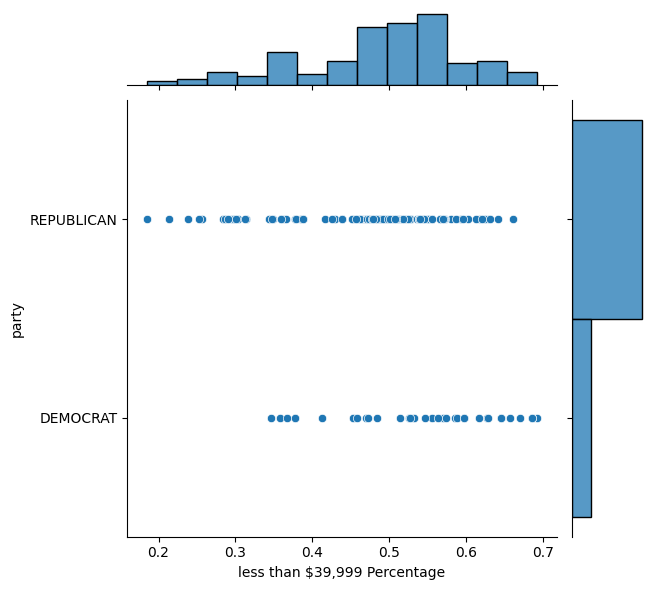

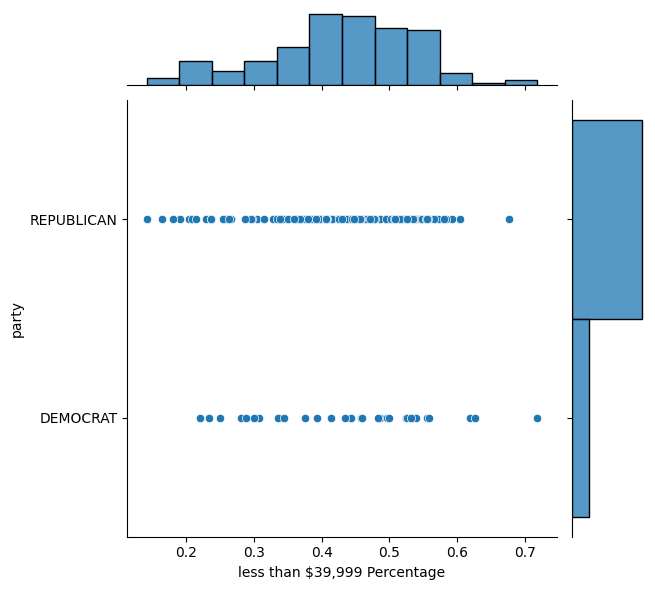

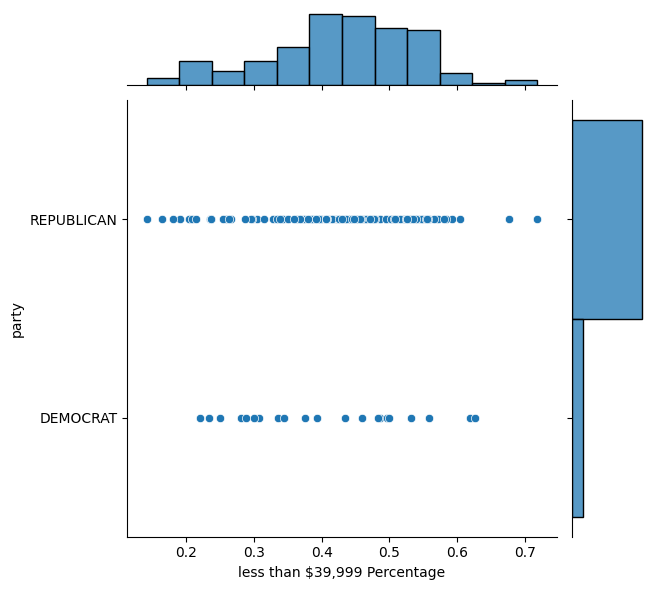

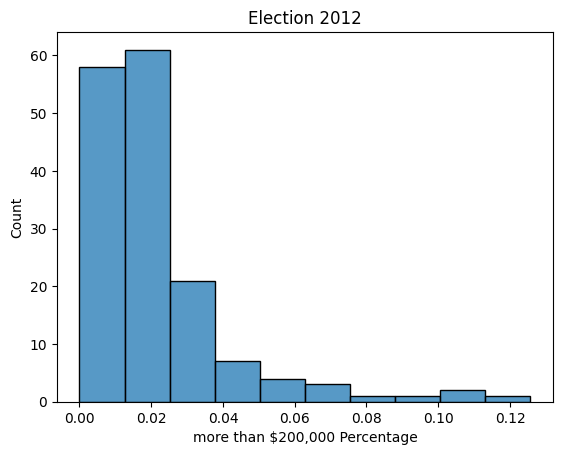

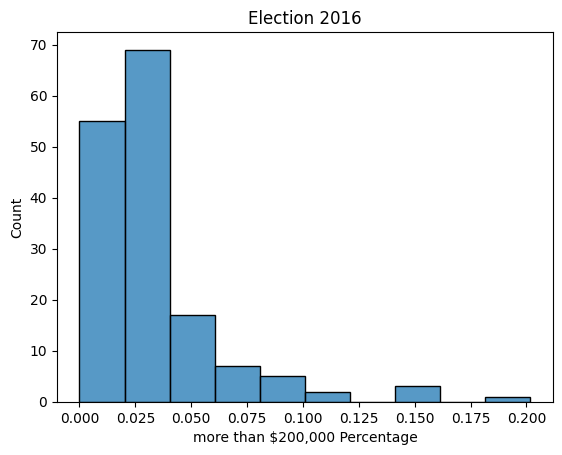

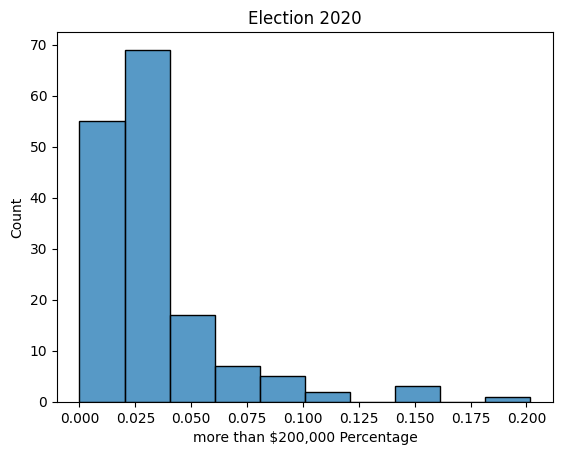

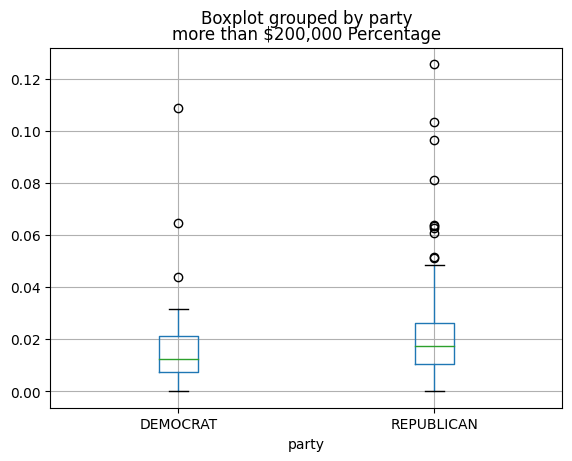

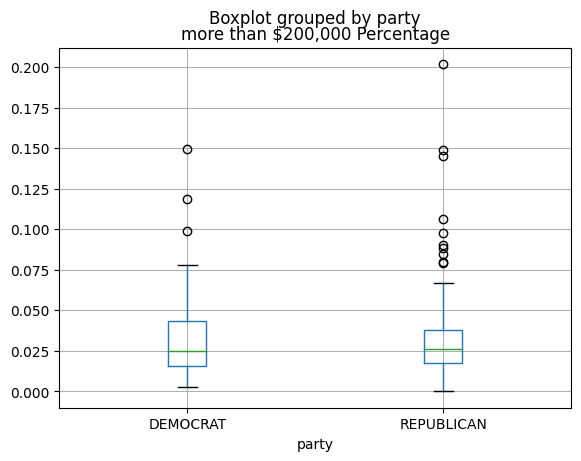

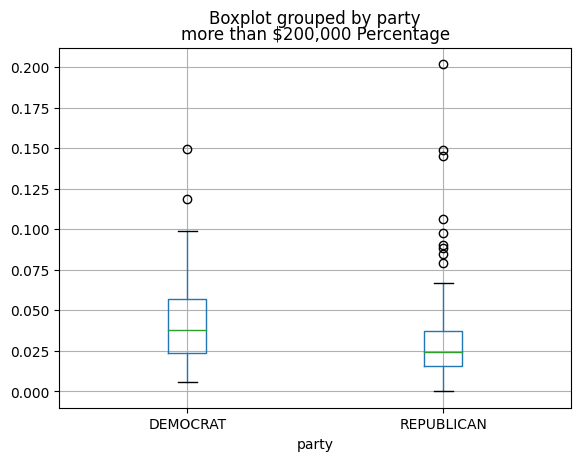

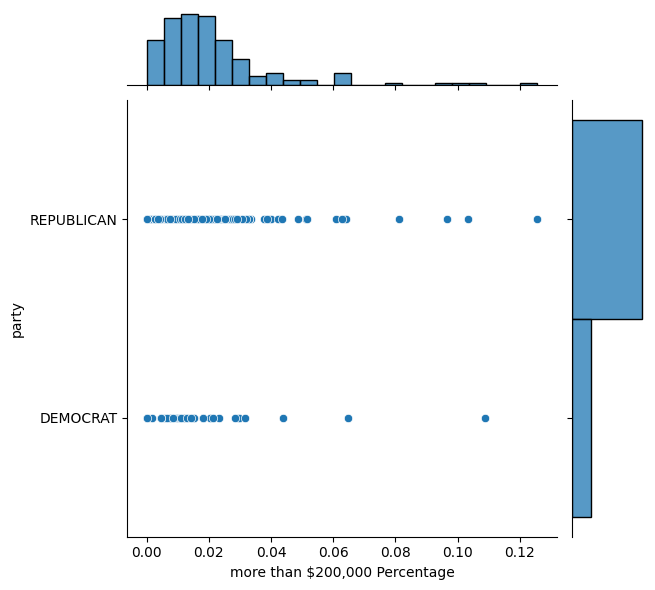

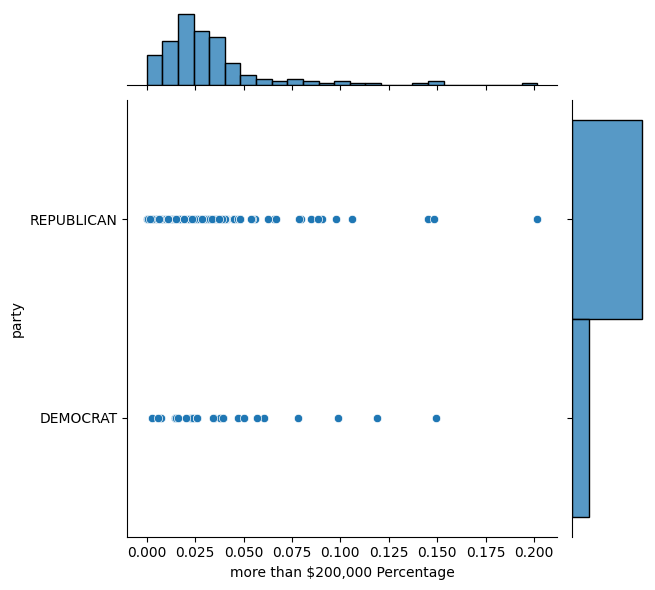

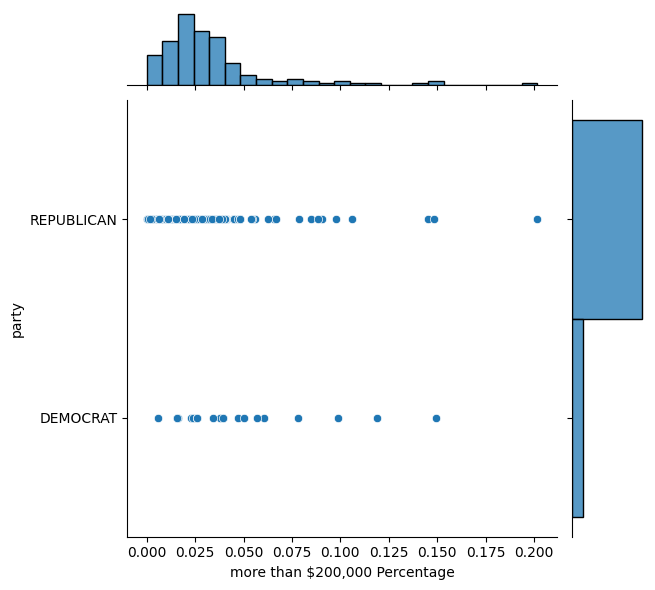

In [ ]:
# EDA - Economic status

sns.histplot(election2012['less than $39,999 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['less than $39,999 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['less than $39,999 Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of incomes under $40k
plt.title('Election 2020')

election2012.boxplot(column = 'less than $39,999 Percentage',by = 'party')
election2016.boxplot(column = 'less than $39,999 Percentage',by = 'party')
election2020.boxplot(column = 'less than $39,999 Percentage',by = 'party') # Boxplot of proportion earning under $40k by voted party

sns.jointplot(x=election2012['less than $39,999 Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['less than $39,999 Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['less than $39,999 Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


sns.histplot(election2012['more than $200,000 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['more than $200,000 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['more than $200,000 Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of incomes over $200k
plt.title('Election 2020')

election2012.boxplot(column = 'more than $200,000 Percentage',by = 'party')
election2016.boxplot(column = 'more than $200,000 Percentage',by = 'party')
election2020.boxplot(column = 'more than $200,000 Percentage',by = 'party') # Boxplot of proportion earning over $200k by voted party

sns.jointplot(x=election2012['more than $200,000 Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['more than $200,000 Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['more than $200,000 Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)

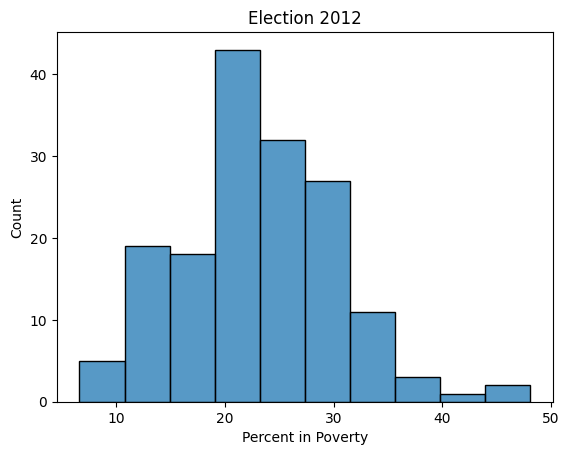

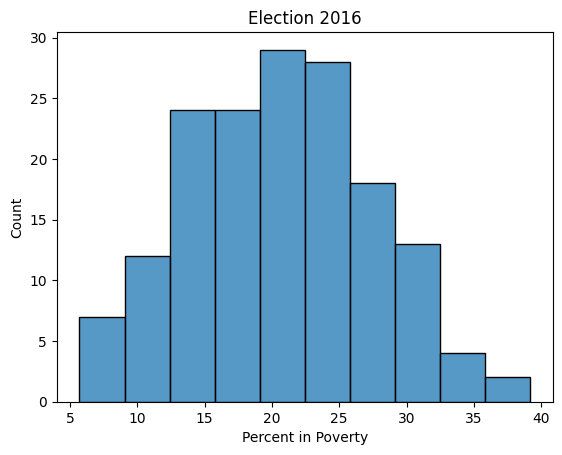

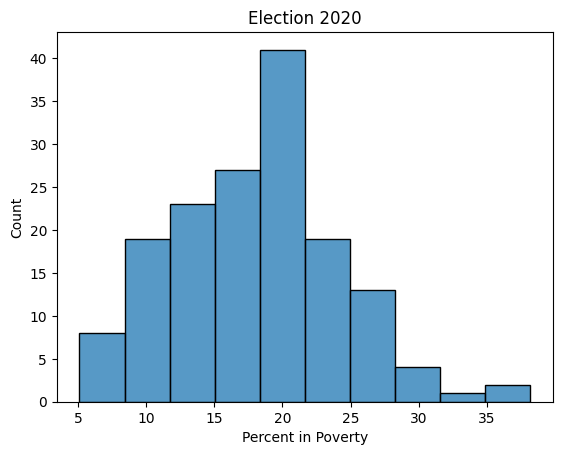

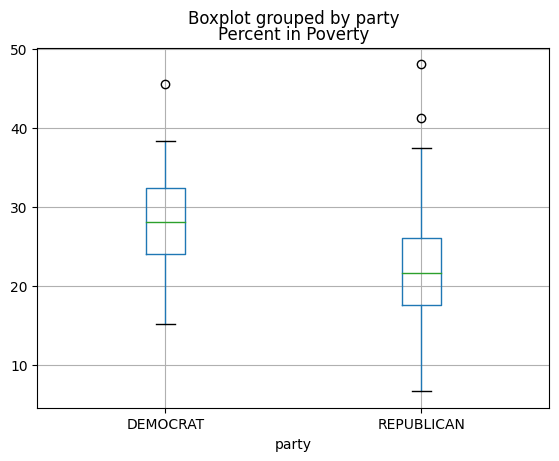

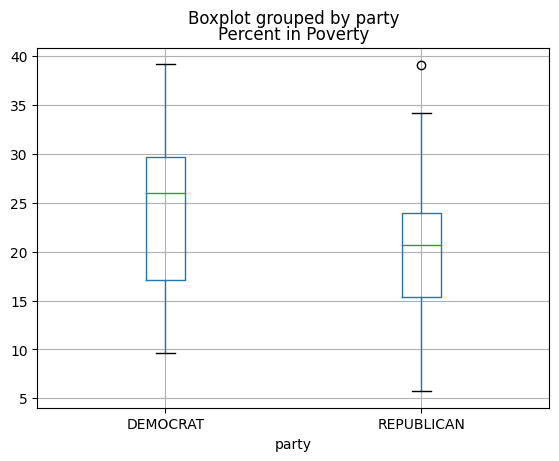

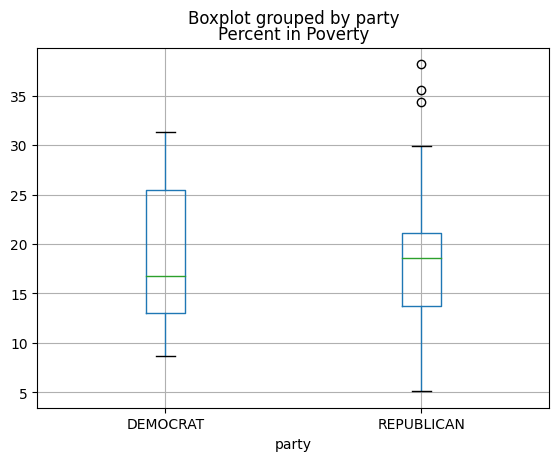

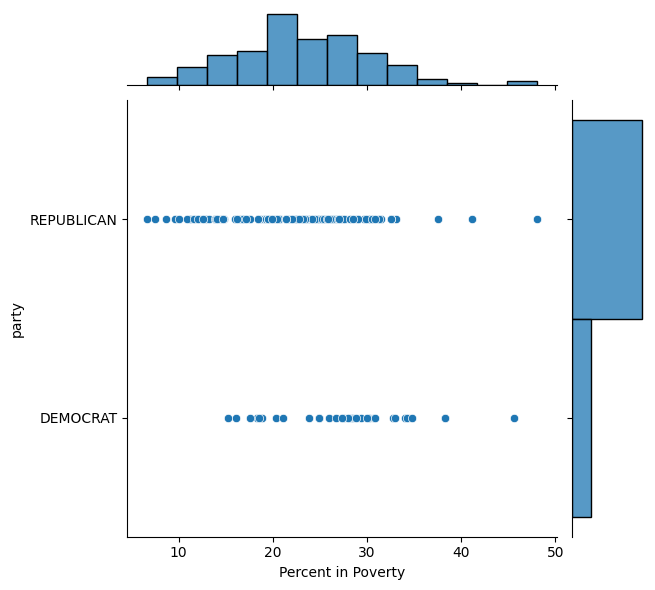

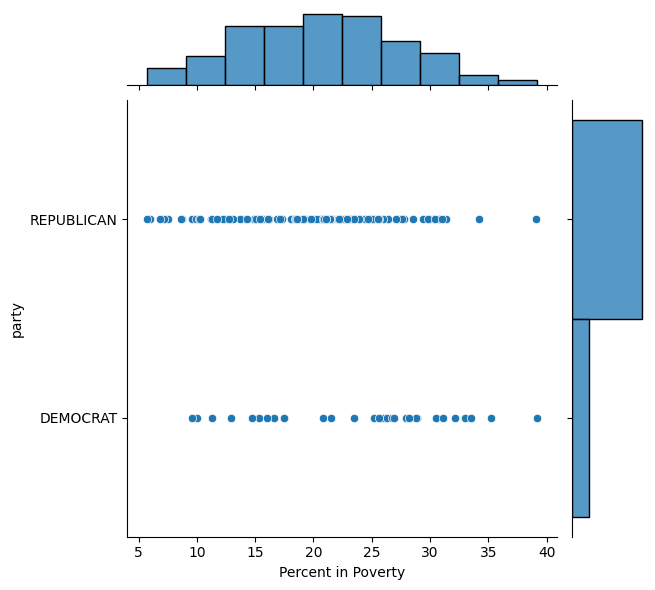

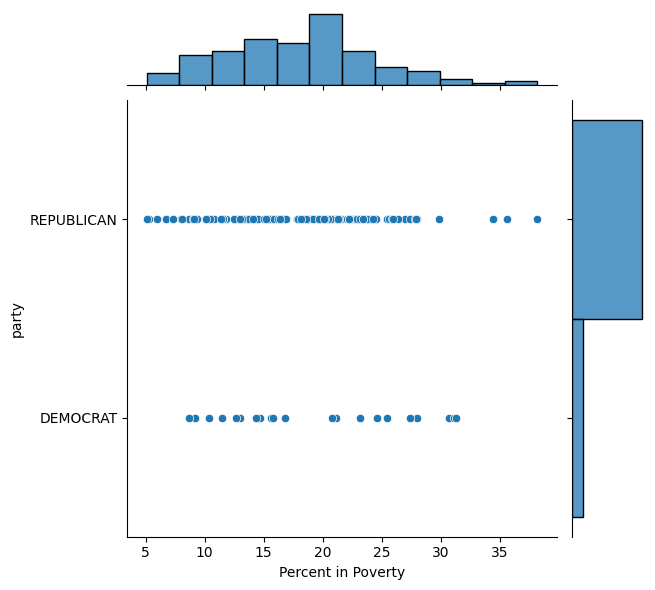

In [ ]:
# EDA - Poverty

sns.histplot(election2012['Percent in Poverty'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Percent in Poverty'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Percent in Poverty'], bins = 10, figure=plt.figure()) # Histogram distribution of % in poverty
plt.title('Election 2020')

election2012.boxplot(column = 'Percent in Poverty',by = 'party')
election2016.boxplot(column = 'Percent in Poverty',by = 'party')
election2020.boxplot(column = 'Percent in Poverty',by = 'party') # Boxplot of county poverty rates by voted party

sns.jointplot(x=election2012['Percent in Poverty'],y=election2012['party'])
sns.jointplot(x=election2016['Percent in Poverty'],y=election2016['party'])
sns.jointplot(x=election2020['Percent in Poverty'],y=election2020['party']) # Joint plots (histogram x scatterplot)